In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D
import itertools


from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
wt_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/WT', every=10)
d4_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/D4', every=10)

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


In [8]:
ls = lmp.LMP(md_dir=None)

dijs_d4, dijs_d12, dijs_wt, dijs_d7  = [],[],[],[]
prots = ["D4", "WT"]
for T in range(8):
    s = np.genfromtxt(f'/home/adria/powerlaws/flory_dij_D4_{T}.txt')
    dijs_d4.append([np.arange(440),*s])
    
    s = np.genfromtxt(f'/home/adria/powerlaws/flory_dij_WT_{T}.txt')
    dijs_wt.append([np.arange(448),*s])

dijs_wt = np.array(dijs_wt)
dijs_d4 = np.array(dijs_d4)
wt_florys = ls.flory_scaling_fit(ijs=dijs_wt)[0]
d4_florys = ls.flory_scaling_fit(ijs=dijs_d4)[0]

In [9]:
wt_florys_eq = wt_08_hps_T.flory_scaling_formula()
d4_florys_eq = d4_08_hps_T.flory_scaling_formula()

def get_tc(florys, temps):
    slope = florys[1]-florys[0]
    slope /= temps[1]-temps[0]
    x = np.linspace(270,300, 8)
    fit = slope*(x-temps[1])+florys[1]
    return (0.5-florys[1])/slope+temps[1]

wt_tc_fit = get_tc(wt_florys, wt_08_hps_T.temperatures)
d4_tc_fit = get_tc(d4_florys, d4_08_hps_T.temperatures)

wt_tc_eq = get_tc(wt_florys_eq, wt_08_hps_T.temperatures)
d4_tc_eq = get_tc(d4_florys_eq, d4_08_hps_T.temperatures)

[51.385481   46.12113533 40.36979169 37.92032266 39.28142923 43.84458601
 51.3696931  59.38931221]
[50.04802204 45.07064819 38.92310942 36.59336626 37.11798887 41.49377575
 49.43683636 57.75885003]


In [23]:
wt_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')
wt_slab
rho_d = wt_slab[:7,0]
rho_c = wt_slab[8:,0]
rho_c, tc = wt_slab[8,0], wt_slab[8,1]
# fit, cr = wt_08_hps_T.find_Tc_from_diagram(rho_c=rho_c,rho_d=rho_d,temperatures=(wt_slab[7:,0]))
# rho_c, tc = cr[0], cr[1]
# rho_c, rho_d, wt_slab

In [38]:
dijs_wt[:,1,:], dijs_wt[:,2,:]

(array([[  0.        ,   3.82780862,   6.63430309, ..., 110.57128906,
         110.70986938, 110.85678864],
        [  0.        ,   3.82879996,   6.62629032, ...,  98.38191223,
          98.54141998,  98.7256012 ],
        [  0.        ,   3.82961202,   6.62092924, ...,  83.63545227,
          83.85527802,  84.07794189],
        ...,
        [  0.        ,   3.8341794 ,   6.6140151 , ...,  91.0507431 ,
          91.2530899 ,  91.48456573],
        [  0.        ,   3.83646441,   6.61757278, ..., 109.58626556,
         109.71715546, 109.84368896],
        [  0.        ,   3.83863401,   6.62036991, ..., 124.58544159,
         124.66052246, 124.73278809]]),
 array([[11.15735054, 11.15708351, 11.15703964, ..., 11.1571579 ,
         11.1570425 , 11.15731239],
        [ 9.49898529,  9.49921894,  9.49909496, ...,  9.49901295,
          9.49901009,  9.50002384],
        [ 7.21704865,  7.21722174,  7.21703482, ...,  7.21704817,
          7.21706295,  7.21704388],
        ...,
        [ 8.652445

/home/adria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


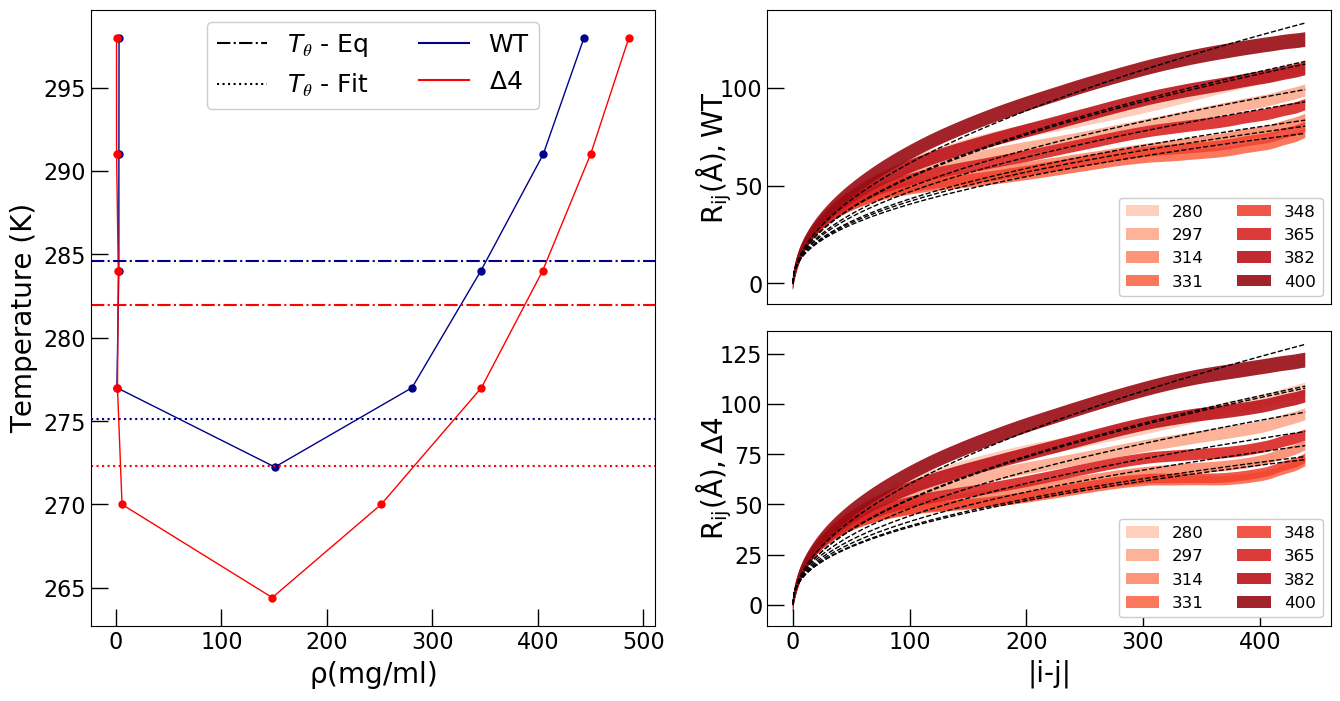

In [41]:
fig = plt.figure(figsize=(16, 8))

grid = plt.GridSpec(16, 8, wspace=2, hspace=2)
ax1 = plt.subplot(grid[0:16, 0:4])
ax2 = plt.subplot(grid[0:8, 4:8])
ax3 = plt.subplot(grid[8:16, 4:8])
ax2.set_xticks([])

wt_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')
d4_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_d4.txt')

cmap = plt.get_cmap('Reds')
ax1.plot(wt_slab[3:-3,0], wt_slab[3:-3,1], marker='o', ls='-', color=C_W, markersize=5, lw=1)
ax1.plot(d4_slab[3:-3,0], d4_slab[3:-3,1], color=C_4, ls='-', marker='o', lw=1, markersize=5)
    
for t in range(len(wt_08_hps_T.temperatures)):
    ijs = dijs_wt[0,0,:]
    dijs = dijs_wt[:,1,:]
    err = np.sqrt(dijs_wt[:,2,:])
    florys = wt_florys

    
#     ax2.plot(ijs, dijs[t,:], label=wt_08_hps_T.temperatures[t], color=cmap((t+2)/10))
    ax2.fill_between(ijs, dijs[t,:]-err[t,:], dijs[t,:]+err[t,:], facecolor=cmap((t+2)/10),alpha=0.9, label=f"{wt_08_hps_T.temperatures[t]:.0f}")
#     ax2.plot(ijs, dijs[t,:],alpha=0.9, label=f"{wt_08_hps_T.temperatures[t]:.0f}")
    ax2.plot(ijs, 5.5*ijs**florys[t], color='black',  alpha=1, ls='--', lw=1)
    ax2.legend(fontsize=12, ncol=2, loc='lower right')
    
    ijs = dijs_d4[0,0,:]
    dijs = dijs_d4[:,1,:]
    err = np.sqrt(dijs_d4[:,2,:])
    florys = d4_florys
    
#     ax3.plot(ijs, dijs[t,:], label=wt_08_hps_T.temperatures[t], color=cmap((t+2)/10))
    ax3.fill_between(ijs, dijs[t,:]-err[t,:], dijs[t,:]+err[t,:], facecolor=cmap((t+2)/10),alpha=0.9, label=f"{wt_08_hps_T.temperatures[t]:.0f}")
    ax3.plot(ijs, 5.5*ijs**florys[t], color='black',  alpha=1, ls='--', lw=1)
    ax3.legend(fontsize=12, ncol=2, loc='lower right')
    

# ax1.legend([Line2D([0], [0], color=C_W, ls='dashdot'), Line2D([0], [0], color=C_4, ls='dashdot')
#            , Line2D([0], [0], color=C_W, ls='dotted'), Line2D([0], [0], color=C_4, ls='dotted')],
#            ["$T_{𝜃,WT}$ - Eq","$T_{𝜃,\Delta 4}$ - Eq","$T_{𝜃,WT}$ - Fit","$T_{𝜃,\Delta 4}$ - Fit"], ncol=2, fontsize=16, loc='upper center')


ax1.legend([Line2D([0], [0], color='black', ls='dashdot'), Line2D([0], [0], color='black', ls='dotted'),
            Line2D([0], [0], color=C_W), Line2D([0], [0], color=C_4)],
           ["$T_{𝜃}$ - Eq","$T_{𝜃}$ - Fit","WT", "$\Delta$4"], ncol=2, loc='upper center')

ax1.axhline(wt_tc_fit, color=C_W, ls='dotted')
ax1.axhline(d4_tc_fit, color=C_4, ls='dotted')
ax1.axhline(wt_tc_eq, color=C_W, ls='dashdot')
ax1.axhline(d4_tc_eq, color=C_4, ls='dashdot')
ax1.set_xlabel("$\mathrm{ρ(mg/ml)}$")
ax1.set_ylabel("Temperature (K)")
ax3.set_xlabel("|i-j|")
ax2.set_ylabel("$\mathrm{R_{ij} (\AA), WT}$", labelpad=-10)
ax3.set_ylabel("$\mathrm{R_{ij} (\AA), \Delta 4}$", labelpad=-10)

fig.tight_layout()

In [49]:
help(lmp.LMP.rg)
    

Help on function rg in module analysis:

rg(self, use='md', full=False, save=None)
    Calculate rg from the LAMMPS trajectories simulations
    :param use: string, either lmp or md. If lmp get rg's from the log.lammps.T, if md from MDTraj
    :param full: whether we want rg for every frame or its average
    :return: ndarray[T,frames], rg's



In [2]:
wt_1_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/WT')
wt_1_hps = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/WT')

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


In [2]:
wt_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/WT')
# wt_08_hps = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/0.8/WT')

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


In [3]:
tr = wt_08_hps_T

for i in range(len(tr.structures)):
    tr.structures[i] = tr.structures[i][::10]

In [4]:
t_ijs, t_d_ijs, t_err = tr.ij_from_contacts()

In [5]:
t_florys = tr.flory_scaling_fit(ijs=[t_ijs,t_d_ijs,t_err])[0]

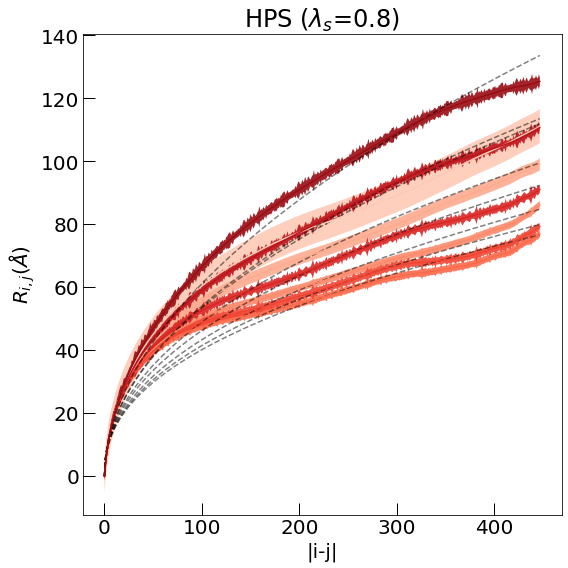

In [10]:
fig, axs = plt.subplots(figsize=(8,8))

cmap = plt.get_cmap('Reds')
for t in range(len(tr.temperatures)):
    axs.plot(t_ijs, 5.5*t_ijs**t_florys[t], color='black', alpha=0.5, ls='--')
    axs.plot(t_ijs, t_d_ijs[t,:], label=tr.temperatures[t], color=cmap((t+2)/10))
    axs.fill_between(t_ijs, t_d_ijs[t,:]-t_err[t,:], t_d_ijs[t,:]+t_err[t,:], facecolor=cmap((t+2)/10),alpha=0.9)

axs.set_xlabel("|i-j|")
axs.set_ylabel("$R_{i,j} (\AA)$")
axs.set_title('HPS ($\lambda_s$=0.8)')

fig.tight_layout()

In [2]:
wt_1_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/WT', every=100)
t_ijs, t_d_ijs, t_err = wt_1_hps_T.ij_from_contacts()
wt_1_hps = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/WT', every=100)
ijs, d_ijs, err = wt_1_hps.ij_from_contacts()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 100 for a total of [1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 100 for a total of [1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001] to avoid strong correlations


In [14]:
t_florys = wt_1_hps_T.flory_scaling_fit(ijs=[t_ijs,t_d_ijs,t_err])[0]
florys = wt_1_hps.flory_scaling_fit(ijs=[ijs,d_ijs,err])[0]

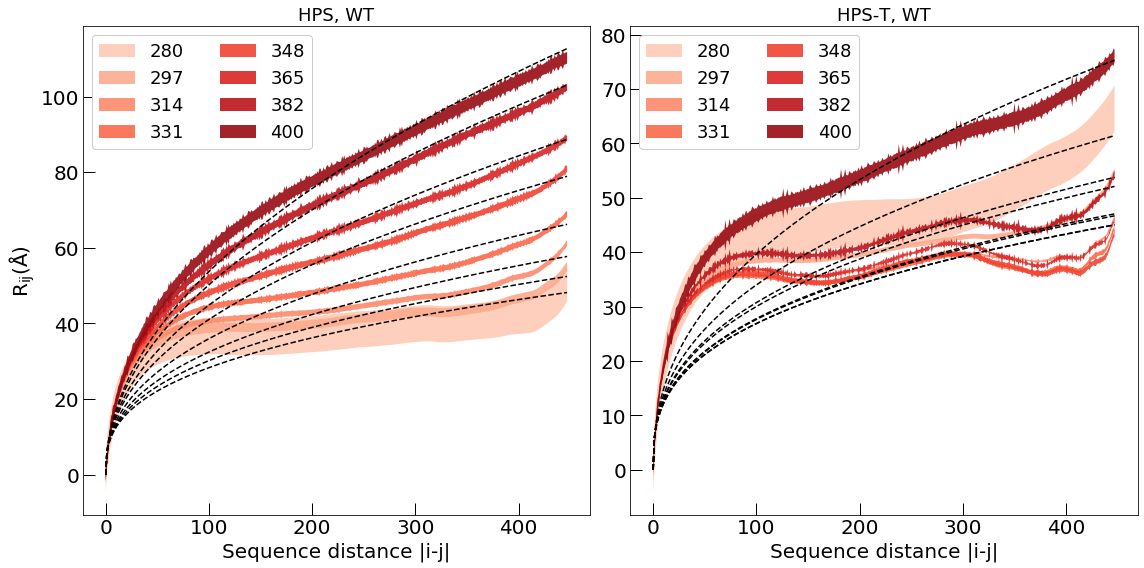

In [62]:
fig, axs = plt.subplots(1,2, figsize=(16,8))

cmap = plt.get_cmap('Reds')
for t in range(len(wt_1_hps.temperatures)):
    axs[0].fill_between(ijs, d_ijs[t,:]-err[t,:], d_ijs[t,:]+err[t,:], facecolor=cmap((t+2)/10),alpha=0.9, label=f"{wt_1_hps.temperatures[t]:.0f}")
#     axs[0].plot(ijs, d_ijs[t,:], , color=cmap((t+2)/10))
    axs[0].plot(ijs, 5.5*ijs**florys[t], color='black', alpha=1, ls='--', lw=1.5)

axs[0].set_xlabel("Sequence distance |i-j|")
axs[0].set_ylabel("$\mathrm{R_{ij} (\AA)}$")
axs[0].set_title('HPS, WT', fontsize=18)
axs[0].legend(ncol=2, loc='upper left')

cmap = plt.get_cmap('Reds')
for t in range(len(wt_1_hps_T.temperatures)):
#     axs[1].plot(t_ijs, 5.5*t_ijs**t_florys[t], color='black', alpha=0.6, ls='--', lw=2)
#     axs[1].plot(t_ijs, t_d_ijs[t,:], label=wt_1_hps_T.temperatures[t], color=cmap((t+2)/10))
    axs[1].fill_between(t_ijs, t_d_ijs[t,:]-t_err[t,:], t_d_ijs[t,:]+t_err[t,:], facecolor=cmap((t+2)/10),alpha=0.9, label=f"{wt_1_hps.temperatures[t]:.0f}")
    axs[1].plot(t_ijs, 5.5*t_ijs**t_florys[t], color='black', alpha=1, ls='--', lw=1.5)


axs[1].set_xlabel("Sequence distance |i-j|")
axs[1].set_title('HPS-T, WT', fontsize=18)
axs[1].legend(ncol=2, loc='upper left')

plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(16,16))

cmap = plt.get_cmap('Reds')
for t in range(len(wt_1_hps.temperatures)):
    axs[0][0].plot(ijs, 5.5*ijs**florys[t], color='black', alpha=0.5, ls='--')
    axs[0][0].plot(ijs, d_ijs[t,:], label=wt_1_hps.temperatures[t], color=cmap((t+2)/10))
    axs[0][0].fill_between(ijs, d_ijs[t,:]-err[t,:], d_ijs[t,:]+err[t,:], facecolor=cmap((t+2)/10),alpha=0.9)
    axs[1][0].plot(wt_1_hps.temperatures[t], florys[t], color=cmap((t+2)/10), marker='o', markersize=8)

axs[1][0].set_xlabel("Temperature (K)")
axs[1][0].set_ylabel("ν")

axs[0][0].set_xlabel("|i-j|")
axs[0][0].set_ylabel("$R_{i,j}$")
axs[0][0].set_title('HPS')

cmap = plt.get_cmap('Reds')
for t in range(len(wt_1_hps_T.temperatures)):
    axs[0][1].plot(t_ijs, 5.5*t_ijs**t_florys[t], color='black', alpha=0.5, ls='--')
    axs[0][1].plot(t_ijs, t_d_ijs[t,:], label=wt_1_hps.temperatures[t], color=cmap((t+2)/10))
    axs[0][1].fill_between(t_ijs, t_d_ijs[t,:]-t_err[t,:], t_d_ijs[t,:]+t_err[t,:], facecolor=cmap((t+2)/10),alpha=0.9)
    axs[1][1].plot(wt_1_hps_T.temperatures[t], t_florys[t], color=cmap((t+2)/10), marker='o', markersize=8)
axs[1][1].set_xlabel("Temperature (K)")

axs[0][1].set_xlabel("|i-j|")
axs[0][1].set_title('HPS-T')

